# Multinomial Logistic Regression for Classification problems
For my statistics class we were instructed to do logistic multinomial regression for a classification problem involving liver enzimes. I did this in python and R. This is the R version.

⚠️ Note: This notebook relies on a dataset that is no longer available. Do not re-run unless you provide your own dataset.

In [ ]:
library(tidyverse)
library(readxl)
library(GGally)

In [ ]:
# Read data, display head and structure
data <- read_excel("C:/Users/carlo/Downloads/logmult.xls", sheet = 'Data')

head(data)
str(data)

Paciente,Grupo,AST,ALT,GLDH,OCT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,236,582,10,457
2,1,65,258,20,242
3,1,59,244,16,236
4,1,92,120,6,205
5,1,99,352,13,315
6,1,87,380,7,92


tibble [218 × 6] (S3: tbl_df/tbl/data.frame)
 $ Paciente: num [1:218] 1 2 3 4 5 6 7 8 9 10 ...
 $ Grupo   : num [1:218] 1 1 1 1 1 1 1 1 1 1 ...
 $ AST     : num [1:218] 236 65 59 92 99 87 202 208 105 95 ...
 $ ALT     : num [1:218] 582 258 244 120 352 380 429 539 465 442 ...
 $ GLDH    : num [1:218] 10 20 16 6 13 7 15 14 4 13 ...
 $ OCT     : num [1:218] 457 242 236 205 315 92 715 480 58 229 ...


En un laboratorio de pruebas clínicas, se obtuvo un conjunto de datos con 218 observaciones de 77 pacientes con enfermedades de hígado, los pacientes se dividieron en cuatro grupos correspondientes a cuatro tipos de enfermedades hepáticas:
1. Hepatitis viral aguda (57 pacientes)
2. Hepatitis crónica persistente (44 pacientes)
3. Hepatitis crónica agresiva (40 pacientes)
4. Cirrosis posnecrótica (77 pacientes)

El diagnóstico se basó en cuatro enzimas hepáticas (U / L):

Aspartato aminotransferasa 		(X1: abrevia AST);
Alanina aminotransferasa 			(X2: ALT);
Glutamato deshidrogenasa 		(X3: GLDH);
y Ornitina carboniltransferasa 		(X4: OCT).
_______________________________________________________

In a clinical testing laboratory, a data set with 218 observations from 77 patients with liver diseases was obtained. The patients were divided into four groups corresponding to four types of liver diseases:
1. Acute viral hepatitis (57 patients)
2. Chronic persistent hepatitis (44 patients)
3. Aggressive chronic hepatitis (40 patients)
4. Postnecrotic cirrhosis (77 patients)

The diagnosis was based on four liver enzymes (U/L):

Aspartate aminotransferase (X1: abbreviated AST);
Alanine aminotransferase (X2: ALT);
Glutamate dehydrogenase (X3: GLDH);
and Ornithine carbonyltransferase (X4: OCT).

[1] 1 2 3 4
Levels: 1 2 3 4

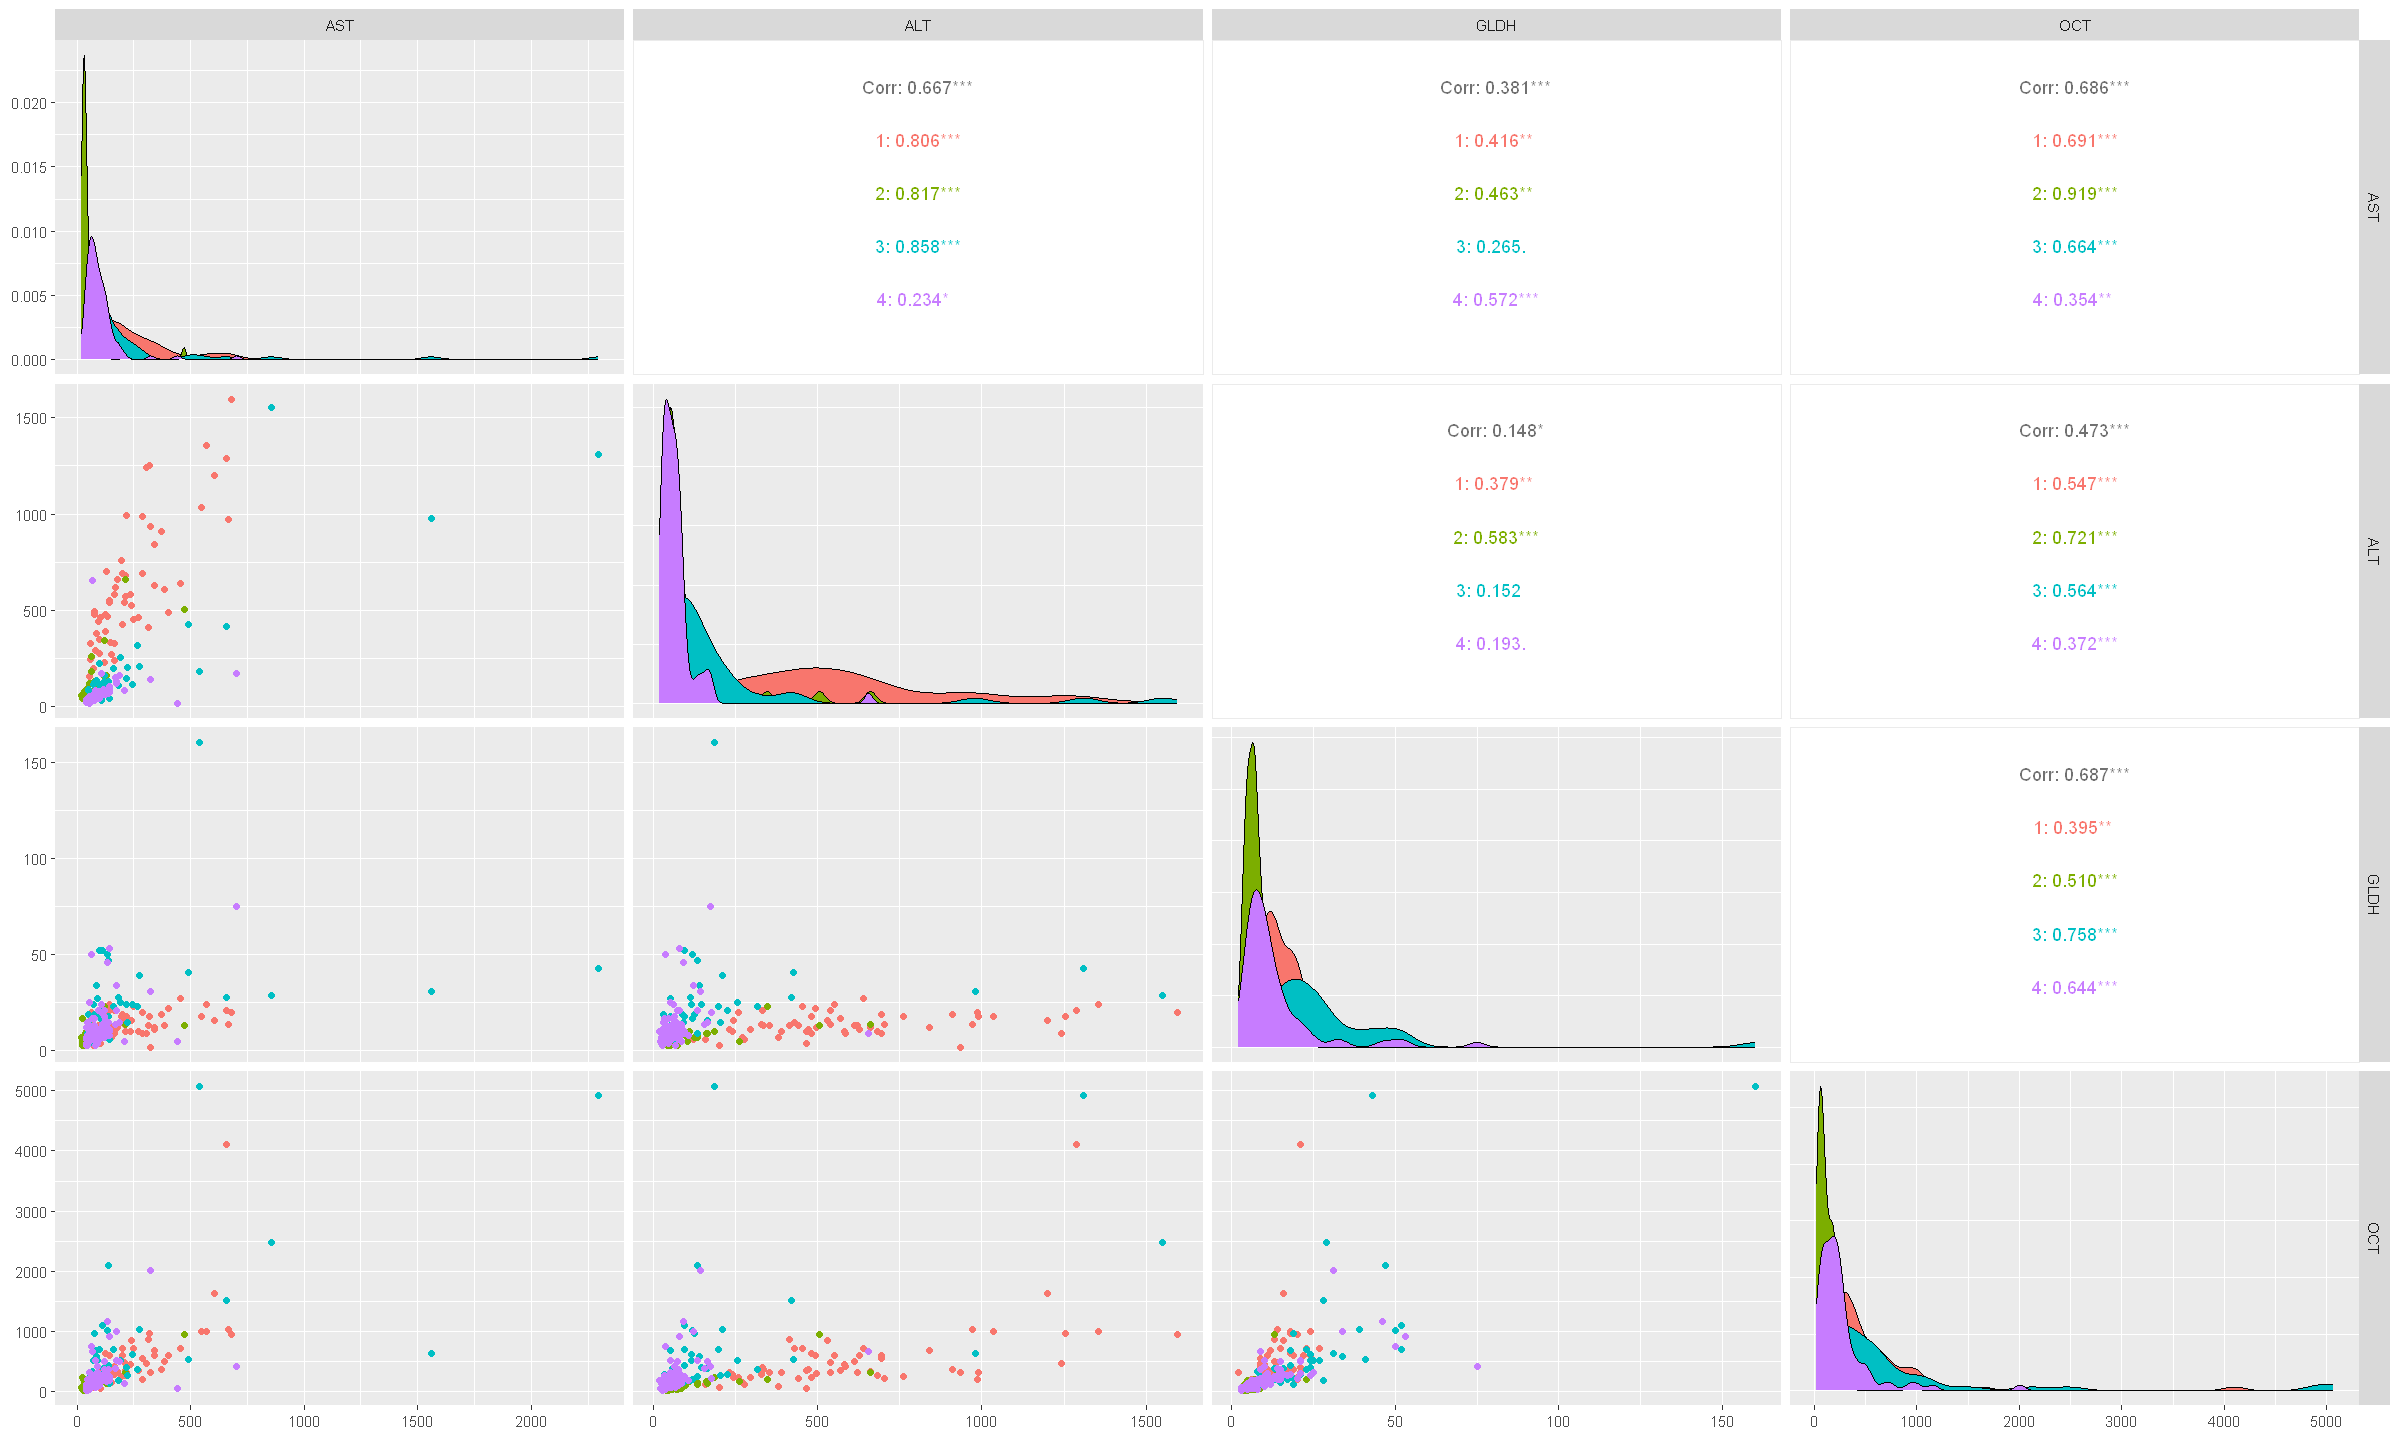

In [ ]:
# Pairwise plot for initial exploration
options(repr.plot.width = 20, repr.plot.height = 12)

data <- data %>%
    relocate(Grupo, .after = last_col()) %>%
    mutate(Grupo = factor(Grupo))

ggpairs(data, columns = 2:5, aes(color = Grupo))
unique(data$Grupo)

Is it odd that group 4 present low enzime levels? I'm not a medic, my parents are, maybe they would know. Anyway, here you can see if the variables are correlated, which they aren't that much. This means that a logistic model should perform well. Since this dataset is not big, I'm not gonna fine tune on a validation set. I'll just split 80/20 train/test and hope for the best.

In [ ]:
set.seed(69)

sample_size <- floor(0.8 * nrow(data))
train <- sample(seq_len(nrow(data)), size = sample_size)
trainset <- data[train, ]
testset <- data[-train, ]

trainset$Grupo <- relevel(trainset$Grupo, ref = 1)

In [ ]:
#install.packages('nnet')
require(nnet)

log_mult <- multinom(Grupo ~ . - Paciente, data = trainset)

summary(log_mult)


# weights:  24 (15 variable)
initial  value 241.215219 
iter  10 value 182.215520
iter  20 value 128.729872
iter  30 value 128.010507
iter  40 value 128.006561
final  value 128.006306 
converged


Call:
multinom(formula = Grupo ~ . - Paciente, data = trainset)

Coefficients:
  (Intercept)         AST          ALT        GLDH         OCT
2   2.9959532 -0.01014032 -0.009845885 -0.04722007 0.004700647
3  -0.3244559  0.01147447 -0.025234236  0.09640505 0.010373692
4   1.9239615  0.01886276 -0.040516721  0.04059883 0.010583333

Std. Errors:
  (Intercept)         AST         ALT       GLDH         OCT
2   0.7912568 0.007094039 0.003134359 0.08847737 0.003378752
3   0.8172382 0.004010363 0.005843251 0.07774935 0.002991117
4   0.7770042 0.004843404 0.006830018 0.07886246 0.003054660

Residual Deviance: 256.0126 
AIC: 286.0126 

In [ ]:
head(round(fitted(log_mult), 2))
str(round(fitted(log_mult), 2))

,1,2,3,4
1,0.00,0.01,0.39,0.60
2,0.04,0.43,0.11,0.43
3,0.00,0.00,0.32,0.67
4,0.28,0.03,0.59,0.10
5,0.03,0.12,0.46,0.39
6,0.00,0.00,0.66,0.34


 num [1:174, 1:4] 0 0.04 0 0.28 0.03 0 0.01 0.02 0.01 0.82 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:174] "1" "2" "3" "4" ...
  ..$ : chr [1:4] "1" "2" "3" "4"


In [ ]:
preds <- predict(log_mult, newdata = testset, 'class')

# Accuracy for testset and trainset respectively
mean(preds == testset$Grupo)
mean(predict(log_mult, trainset, 'class') == trainset$Grupo)

[1] 0.7954545

[1] 0.7816092

In [ ]:
conf_mat <- table(testset$Grupo, preds)

conf_mat
str(conf_mat)

   preds
     1  2  3  4
  1  9  3  2  0
  2  0  7  0  0
  3  0  1  4  2
  4  0  1  0 15

 'table' int [1:4, 1:4] 9 0 0 0 3 7 1 1 2 0 ...
 - attr(*, "dimnames")=List of 2
  ..$      : chr [1:4] "1" "2" "3" "4"
  ..$ preds: chr [1:4] "1" "2" "3" "4"


In [ ]:
conf_df <- as.data.frame(conf_mat)

head(conf_df)

,Var1,preds,Freq
,<fct>,<fct>,<int>
1,1,1,9
2,2,1,0
3,3,1,0
4,4,1,0
5,1,2,3
6,2,2,7


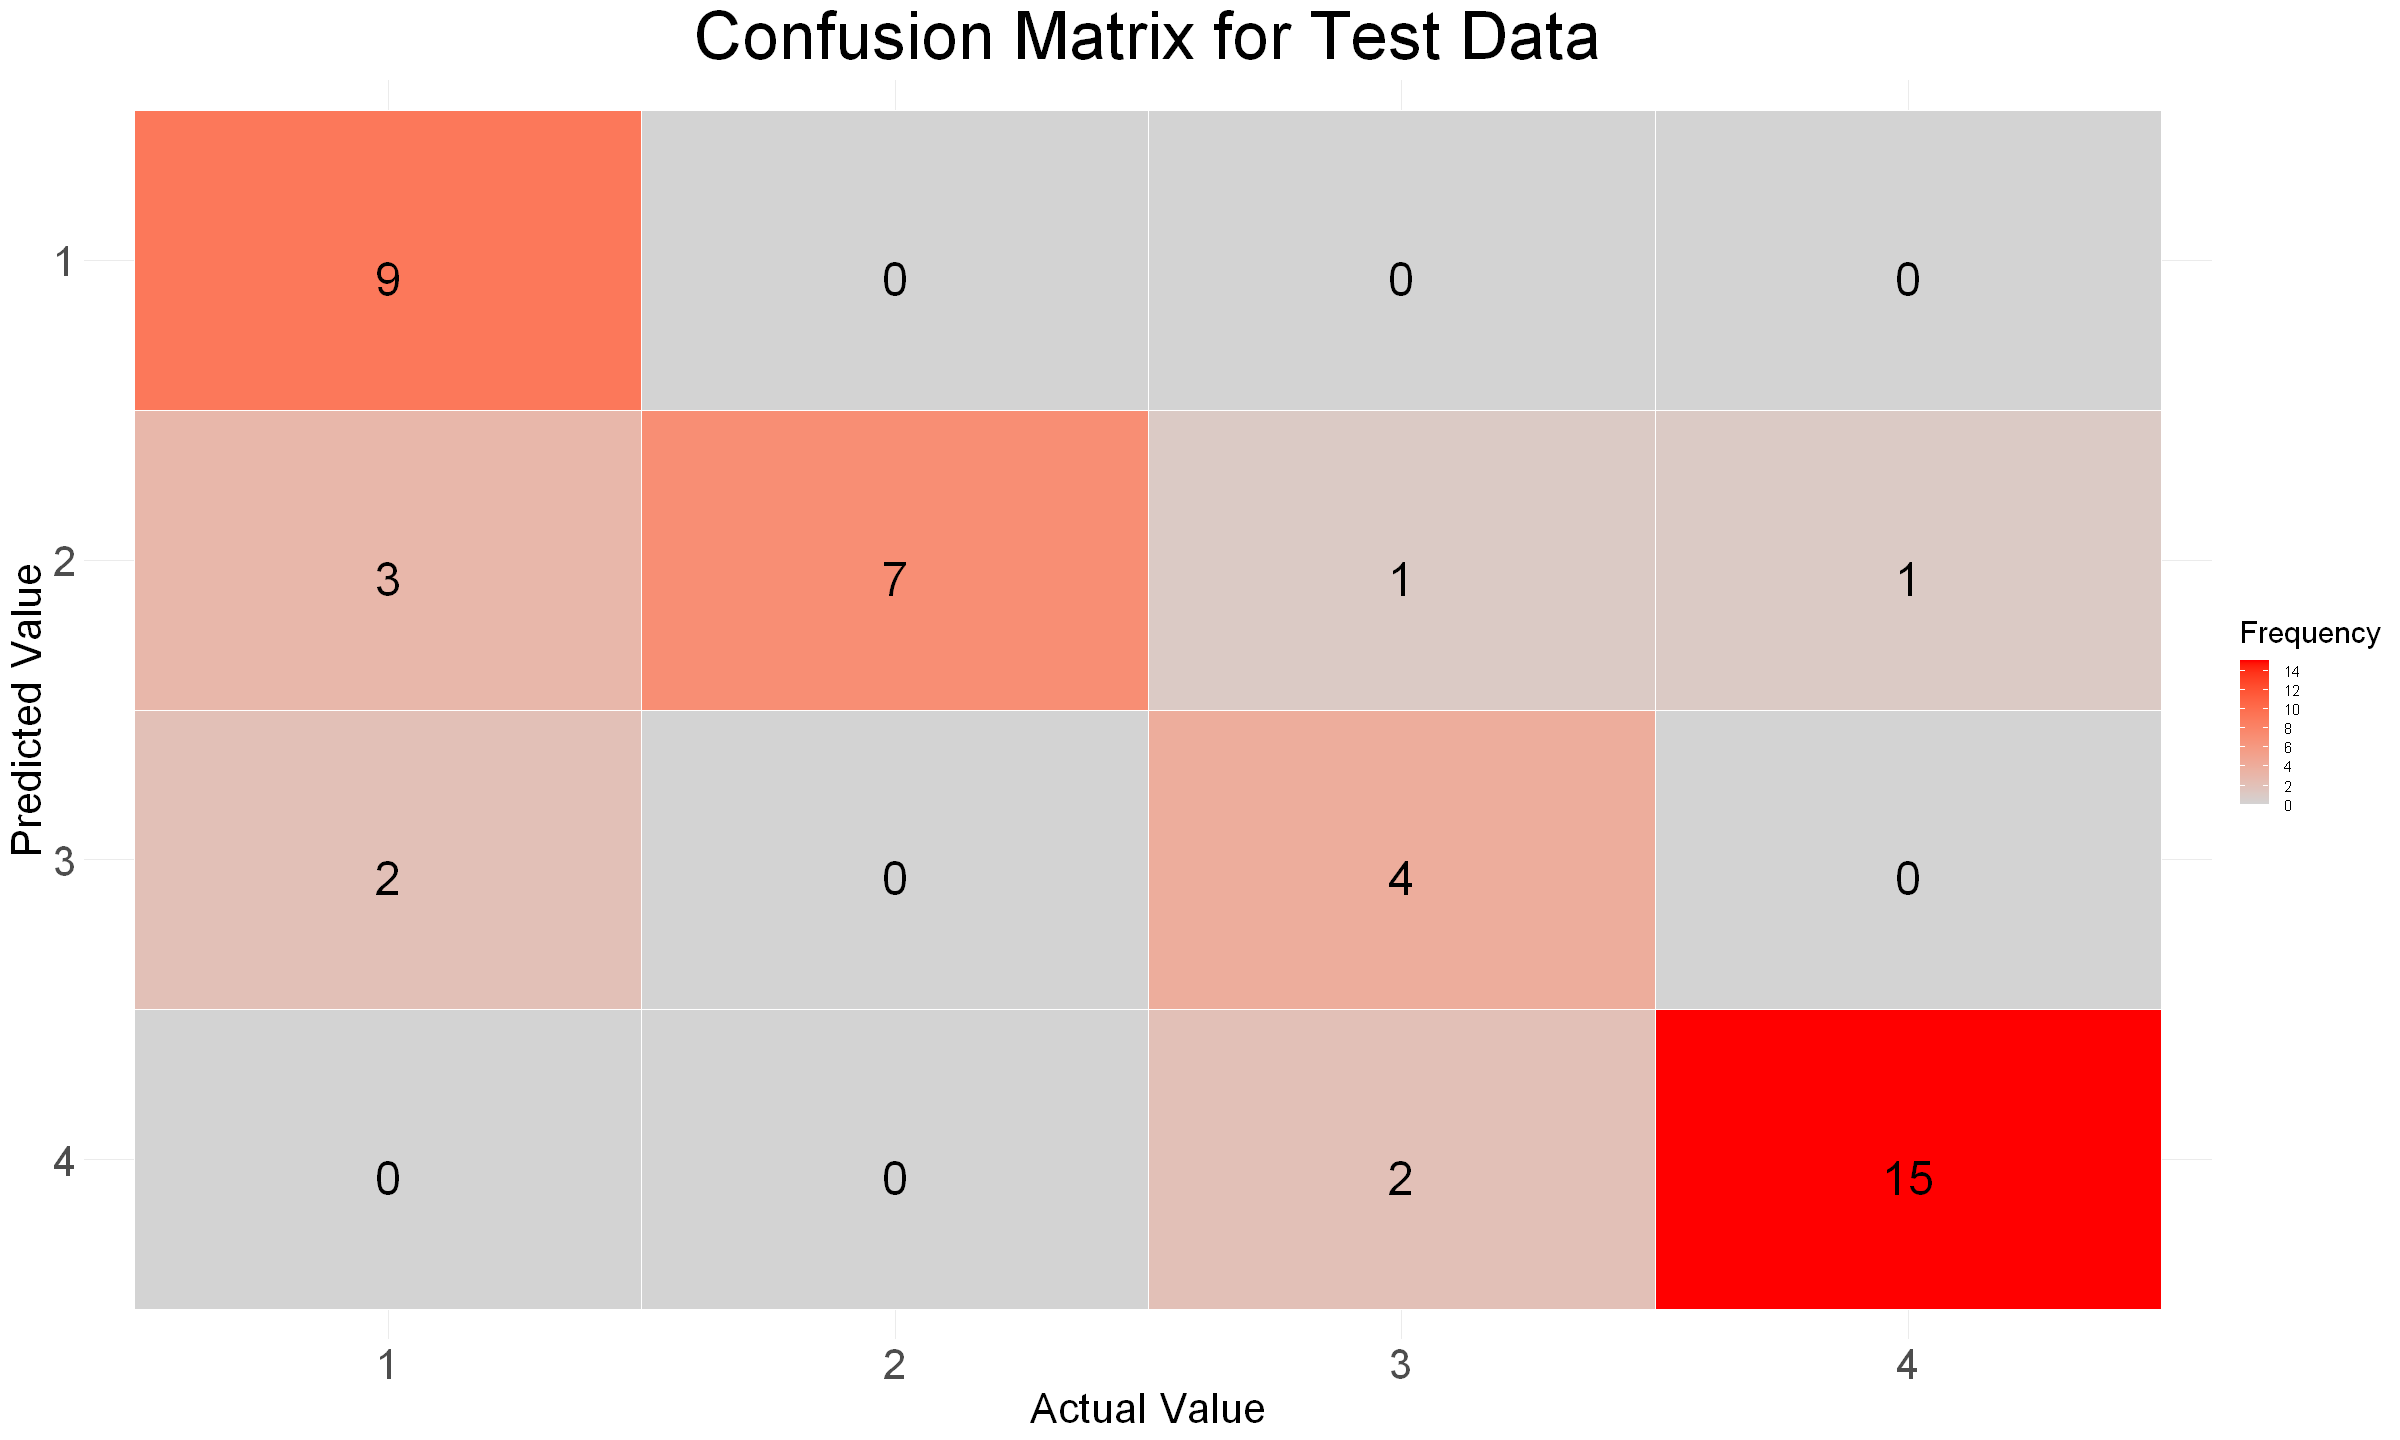

In [ ]:
# Plot confusion matrix using ggplot, I like this one better than seaborn's
ggplot(conf_df, aes(x = Var1 , y = preds, fill = Freq)) +
    geom_tile(color = 'white') +
    scale_fill_gradient(low = "lightgray", high = "red", breaks = seq(min(conf_df$Freq), max(conf_df$Freq), by = 2)) +
    geom_text(aes(label = Freq), vjust = 1, size = 10) +
    theme_minimal() +
    labs(title = 'Confusion Matrix', x = 'Actual Value', y = 'Predicted Value', fill = "Frequency") +
    scale_y_discrete(limits = rev(levels(conf_df$preds))) +
    ggtitle("Confusion Matrix for Test Data") +
    theme(plot.title = element_text(hjust = 0.5, size = 40),
        axis.text = element_text(size = 25),  # Adjust the size parameter as needed
        axis.title = element_text(size = 25),
        legend.title = element_text(size = 18))

Using fitted() gives different probabilities than using predict(), the accuracy remains the same. I'll use predict() in order to plot the ROC curves for each class later.

In [ ]:
#probs_test <- round(fitted(log_mult, testset), 2)
probs_test <- round(predict(log_mult, newdata = testset, type = 'probs'), 2)

mat <- probs_test[1:44, ]

test_with_preds <- testset %>%
    mutate(pred_Group = preds) %>%
    cbind(mat) %>%
    rename('P(1)' = '1', 'P(2)' = '2', 'P(3)' = '3', 'P(4)' = '4') %>%
    relocate(c(Grupo, pred_Group), .after = last_col())

test_with_preds
mean(test_with_preds$Grupo == test_with_preds$pred_Group)


,Paciente,AST,ALT,GLDH,OCT,P(1),P(2),P(3),P(4),Grupo,pred_Group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,2,65,258,20,242,0.45,0.45,0.09,0.01,1,1
2,3,59,244,16,236,0.38,0.54,0.06,0.01,1,2
3,4,92,120,6,205,0.09,0.45,0.14,0.32,1,2
4,7,202,429,15,715,0.38,0.21,0.40,0.01,1,3
5,14,308,1243,9,470,1.00,0.00,0.00,0.00,1,1
6,16,196,760,18,249,1.00,0.00,0.00,0.00,1,1
7,17,141,550,24,610,0.88,0.11,0.02,0.00,1,1
8,19,569,1354,24,996,1.00,0.00,0.00,0.00,1,1
9,23,165,330,21,402,0.51,0.18,0.29,0.02,1,1


[1] 0.7954545

Accuracy is around 80% for the testset predictions. Given that this is a small dataset, we won't tune the model any further.

In [ ]:
probs_train <- round(fitted(log_mult, trainset), 2)
preds_train <- predict(log_mult, newdata = trainset, 'class')
mat_train <- probs_train[1:174, ]

train_with_preds <- trainset %>%
    mutate(pred_Group = preds_train) %>%
    cbind(mat_train) %>%
    rename('P(1)' = '1', 'P(2)' = '2', 'P(3)' = '3', 'P(4)' = '4') %>%
    relocate(c(Grupo, pred_Group), .after = last_col())

str(train_with_preds)
mean(train_with_preds$Grupo == train_with_preds$pred_Group)

head(train_with_preds)


'data.frame':	174 obs. of  11 variables:
 $ Paciente  : num  68 34 29 11 3 64 26 10 71 6 ...
 $ AST       : num  175 42 91 266 120 141 132 49 71 87 ...
 $ ALT       : num  134 53 52 316 163 78 72 51 42 380 ...
 $ GLDH      : num  21 7 27 23 16 53 11 13 9 7 ...
 $ OCT       : num  516 147 513 364 396 924 237 198 225 92 ...
 $ P(1)      : num  0 0.04 0 0.28 0.03 0 0.01 0.02 0.01 0.82 ...
 $ P(2)      : num  0.01 0.43 0 0.03 0.12 0 0.04 0.2 0.12 0.18 ...
 $ P(3)      : num  0.39 0.11 0.32 0.59 0.46 0.66 0.16 0.19 0.14 0 ...
 $ P(4)      : num  0.6 0.43 0.67 0.1 0.39 0.34 0.78 0.59 0.73 0 ...
 $ Grupo     : Factor w/ 4 levels "1","2","3","4": 4 2 3 3 3 4 4 3 4 1 ...
 $ pred_Group: Factor w/ 4 levels "1","2","3","4": 4 4 4 3 3 3 4 4 4 1 ...


[1] 0.7816092

,Paciente,AST,ALT,GLDH,OCT,P(1),P(2),P(3),P(4),Grupo,pred_Group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,68,175,134,21,516,0.00,0.01,0.39,0.60,4,4
2,34,42,53,7,147,0.04,0.43,0.11,0.43,2,4
3,29,91,52,27,513,0.00,0.00,0.32,0.67,3,4
4,11,266,316,23,364,0.28,0.03,0.59,0.10,3,3
5,3,120,163,16,396,0.03,0.12,0.46,0.39,3,3
6,64,141,78,53,924,0.00,0.00,0.66,0.34,4,3


In [ ]:
#install.packages('pROC')
library(pROC)

roc_list <- lapply(1:ncol(mat), function(i) {
  roc(response = ifelse(testset$Grupo == levels(testset$Grupo)[i], 1, 0),
      predictor = mat[, i])
})

roc_data <- do.call(rbind, lapply(1:length(roc_list), function(i) {
  data.frame(
    FPR = roc_list[[i]]$specificities,
    TPR = roc_list[[i]]$sensitivities,
    Class = levels(testset$Grupo)[i]
  )
}))

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



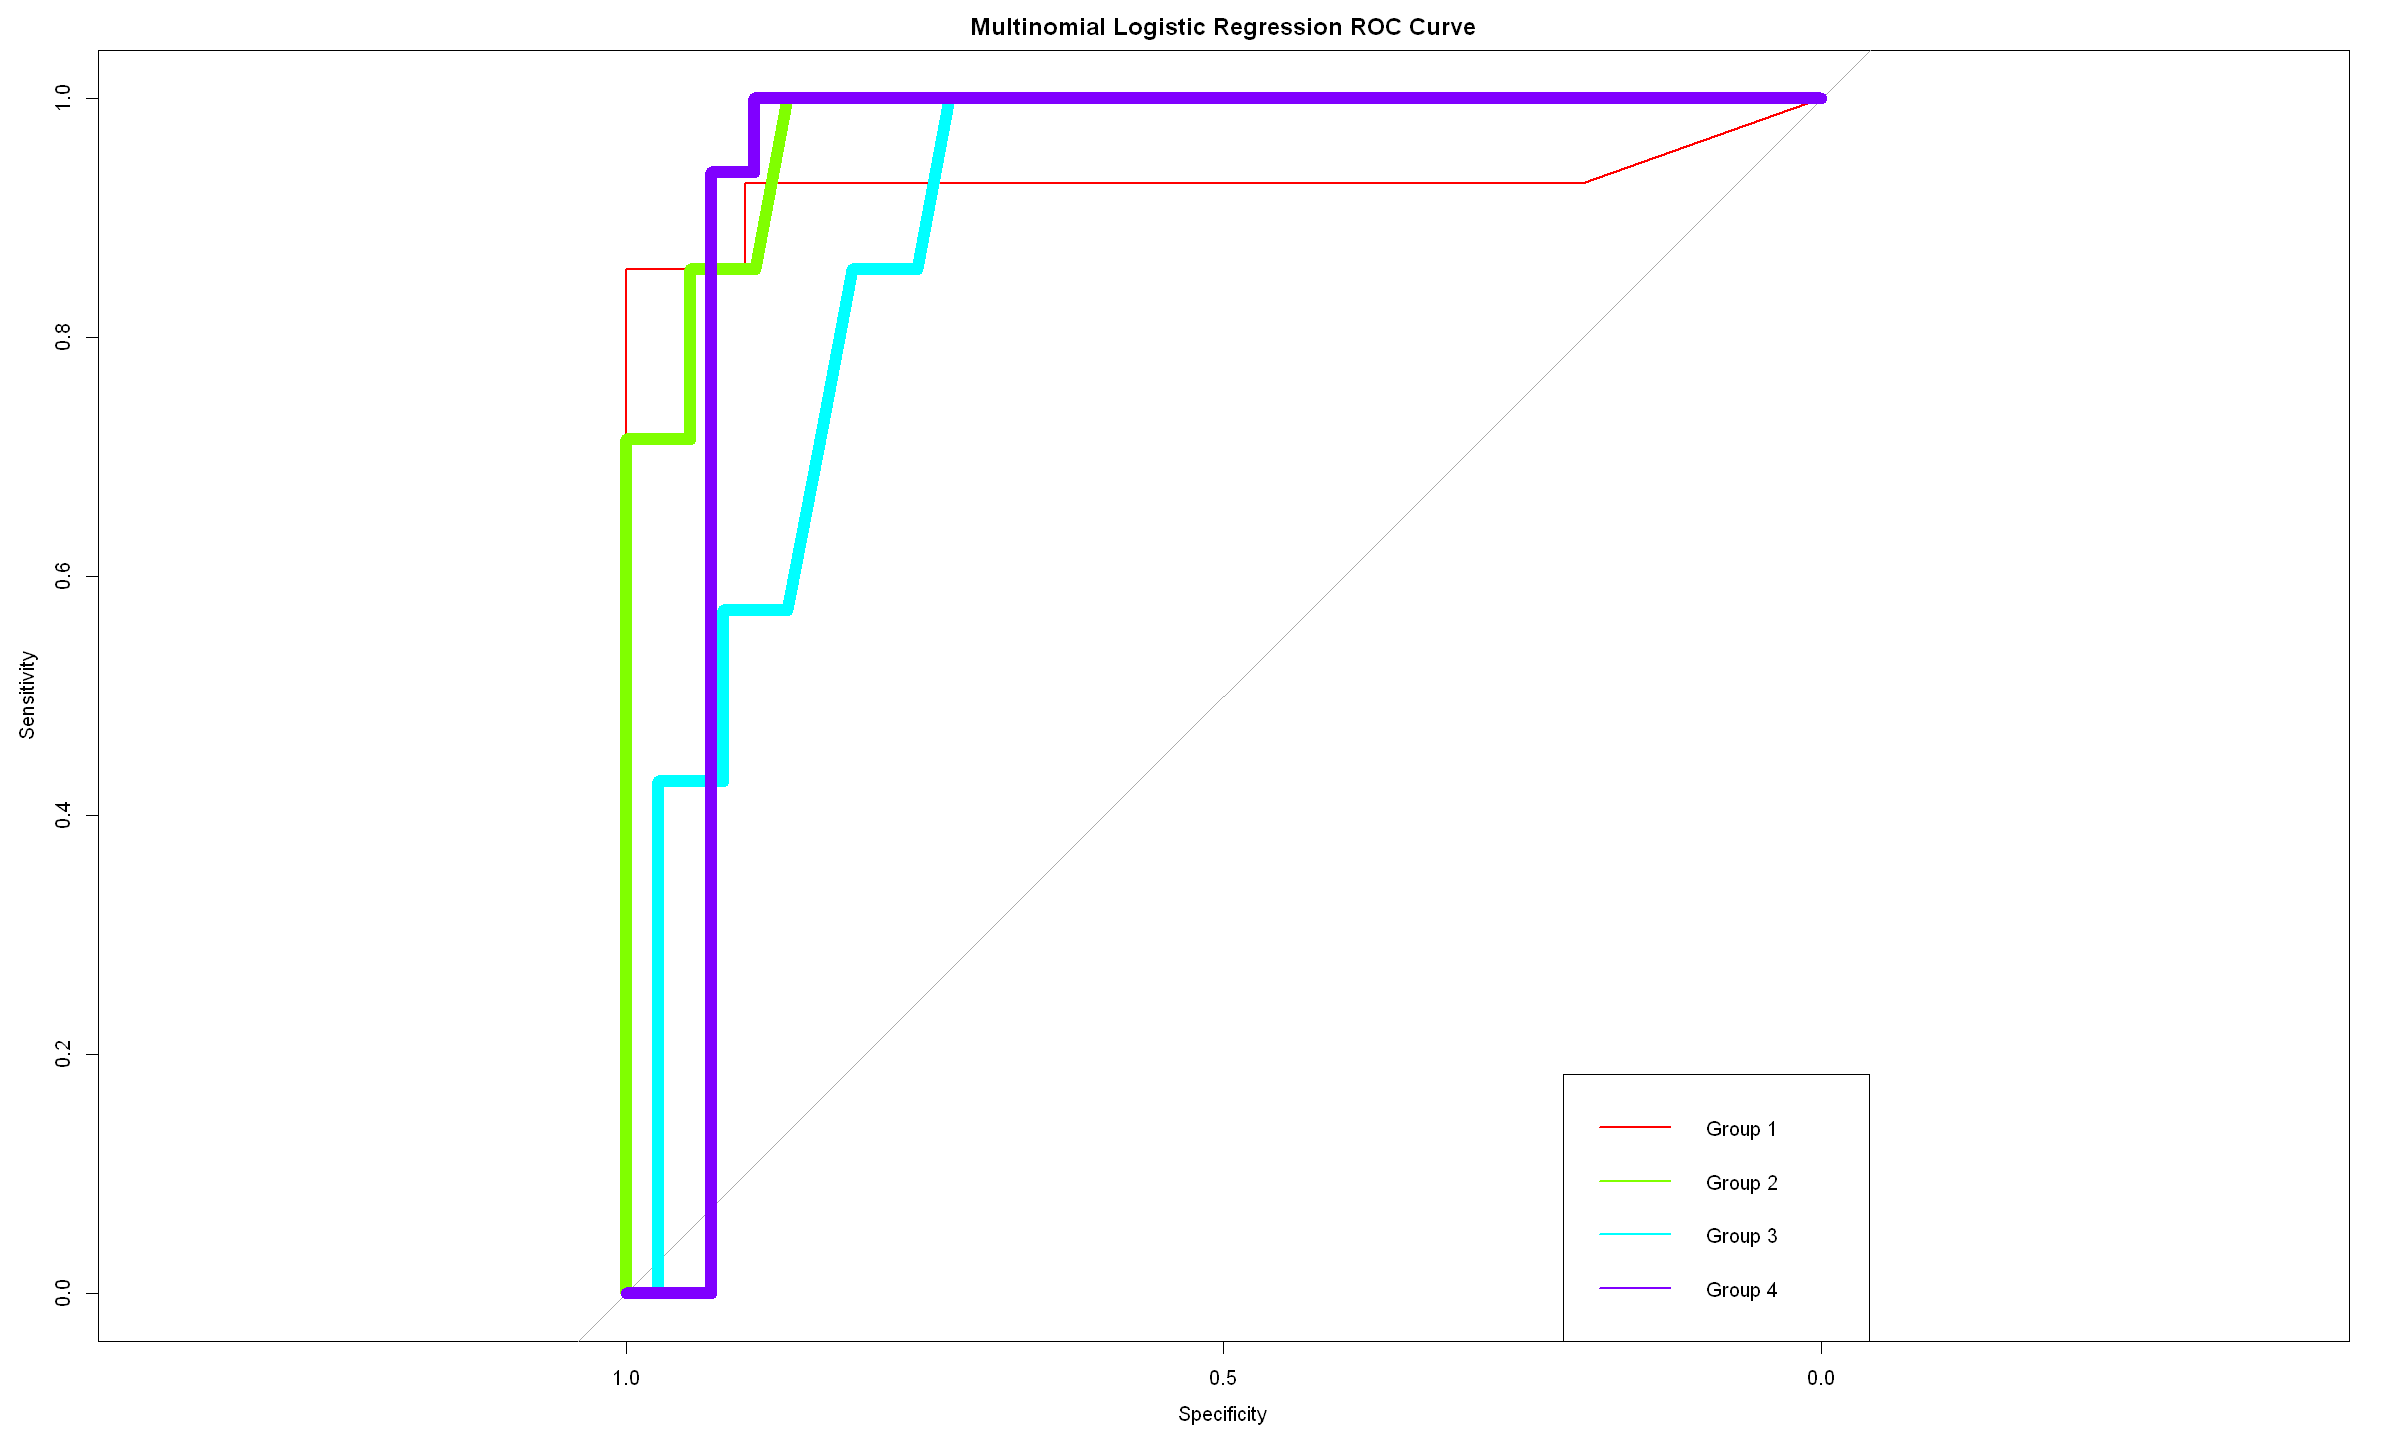

In [ ]:
plot(roc_list[[1]], col = "red", main = "Multinomial Logistic Regression ROC Curve")
for (i in 2:length(roc_list)) {
  lines(roc_list[[i]], col = rainbow(length(roc_list))[i], lwd = 10)
}

legend("bottomright", legend = c("Group 1", "Group 2", "Group 3", "Group 4"), col = c("red", rainbow(length(roc_list))[-1]), lwd = 2)

In [ ]:
auc_values <- sapply(1:ncol(mat), function(i) {
  auc(roc(response = ifelse(testset$Grupo == levels(testset$Grupo)[i], 1, 0),
          predictor = mat[, i]))
})

auc_values
mean(auc_values)

roc_multi <- multiclass.roc(testset$Grupo, mat)

roc_multi

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.9285714 0.9749035 0.8938224 0.9263393

[1] 0.9309091


Call:
multiclass.roc.default(response = testset$Grupo, predictor = mat)

Data: multivariate predictor mat with 4 levels of testset$Grupo: 1, 2, 3, 4.
Multi-class area under the curve: 0.93

It's a good classifier given that the trainset wasn't big. ROC and AUC score for each class is high, the model performs the worst for class 3. I also plotted ROC using ggplot but it looked awkward, pROC library already gives a great option to plot with specificities on the x axis, which I like. I got the same accuracy using python, however, it was not as straightforward as in R and ROC curves are not the same.   